<a href="https://colab.research.google.com/github/brilli44/PCVK_ganjil_24/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nomer 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Nomer 2

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


## Nomer 3

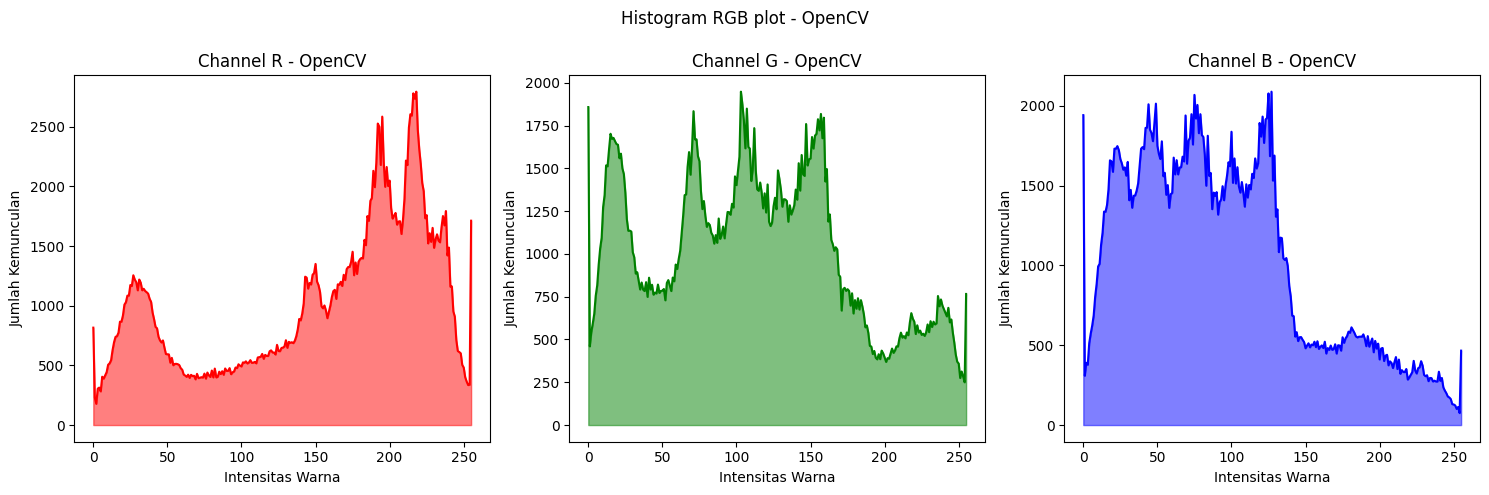

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Konversi gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat histogram untuk setiap channel (R, G, B)
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

plt.figure(figsize=(15,5))
plt.suptitle('Histogram RGB plot - OpenCV')

for channel_id, color in zip(channel_ids, colors):
    # Menggunakan OpenCV untuk menghitung histogram
    histogram = cv2.calcHist([image_rgb], [channel_id], None, [256], [0, 256])

    plt.subplot(1, 3, channel_id + 1)
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram.flatten(), color=color, alpha=0.5)
    plt.title(f'Channel {color.upper()} - OpenCV')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## Nomer 4

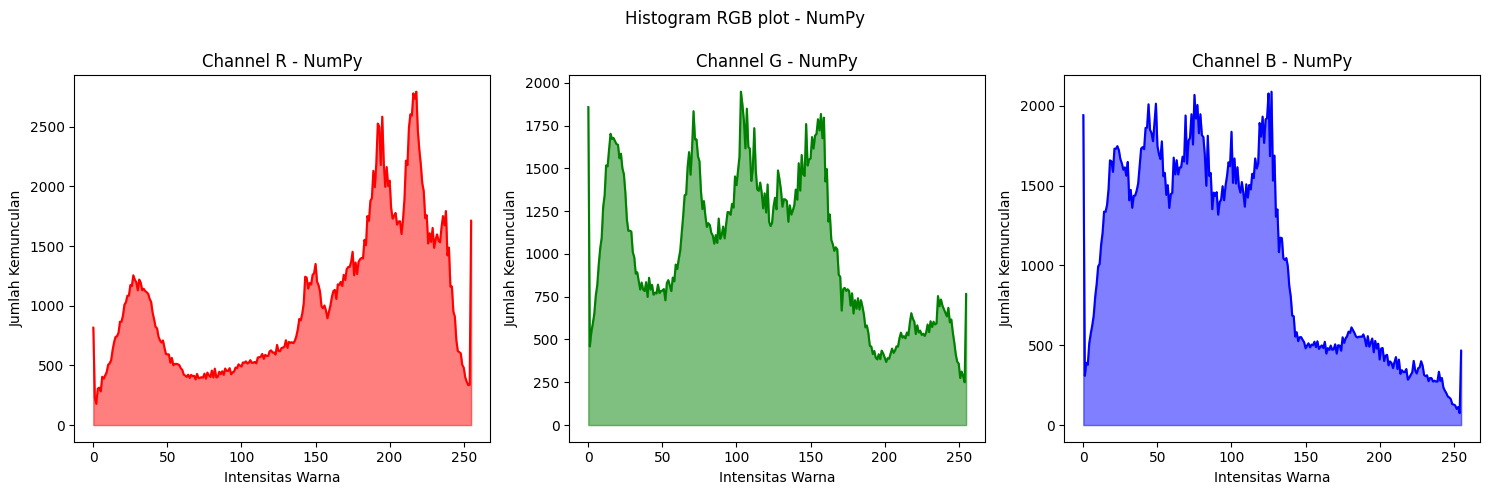

In [ ]:

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Konversi gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat histogram menggunakan NumPy untuk setiap channel (R, G, B)
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

plt.figure(figsize=(15,5))
plt.suptitle('Histogram RGB plot - NumPy')

for channel_id, color in zip(channel_ids, colors):
    # Menggunakan numpy.histogram untuk menghitung histogram
    histogram, bin_edges = np.histogram(
        image_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )

    plt.subplot(1, 3, channel_id + 1)
    plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.fill_between(bin_edges[0:-1], histogram, color=color, alpha=0.5)
    plt.title(f'Channel {color.upper()} - NumPy')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


- Apakah ouput munculnya sama ?
- Jawab : Output dari kedua metode (OpenCV dan NumPy) seharusnya mirip, tetapi tidak identik. Keduanya menghitung distribusi intensitas piksel untuk setiap channel warna (R, G, B), sehingga grafik histogram yang dihasilkan akan menunjukkan pola serupa.

Namun, beberapa faktor dapat menyebabkan perbedaan kecil:

1. **Pengelompokan (Bins)**: Jumlah bins yang berbeda bisa menghasilkan grafik yang sedikit berbeda.
   
2. **Normalisasi**: Cara normalisasi nilai histogram dapat mempengaruhi tampilan.

3. **Visualisasi**: Pengaturan visual seperti warna dan tampilan juga dapat mempengaruhi hasil.

Secara keseluruhan, meskipun hasilnya tidak identik, pola distribusi intensitas piksel biasanya terlihat serupa.


## Nomer 5

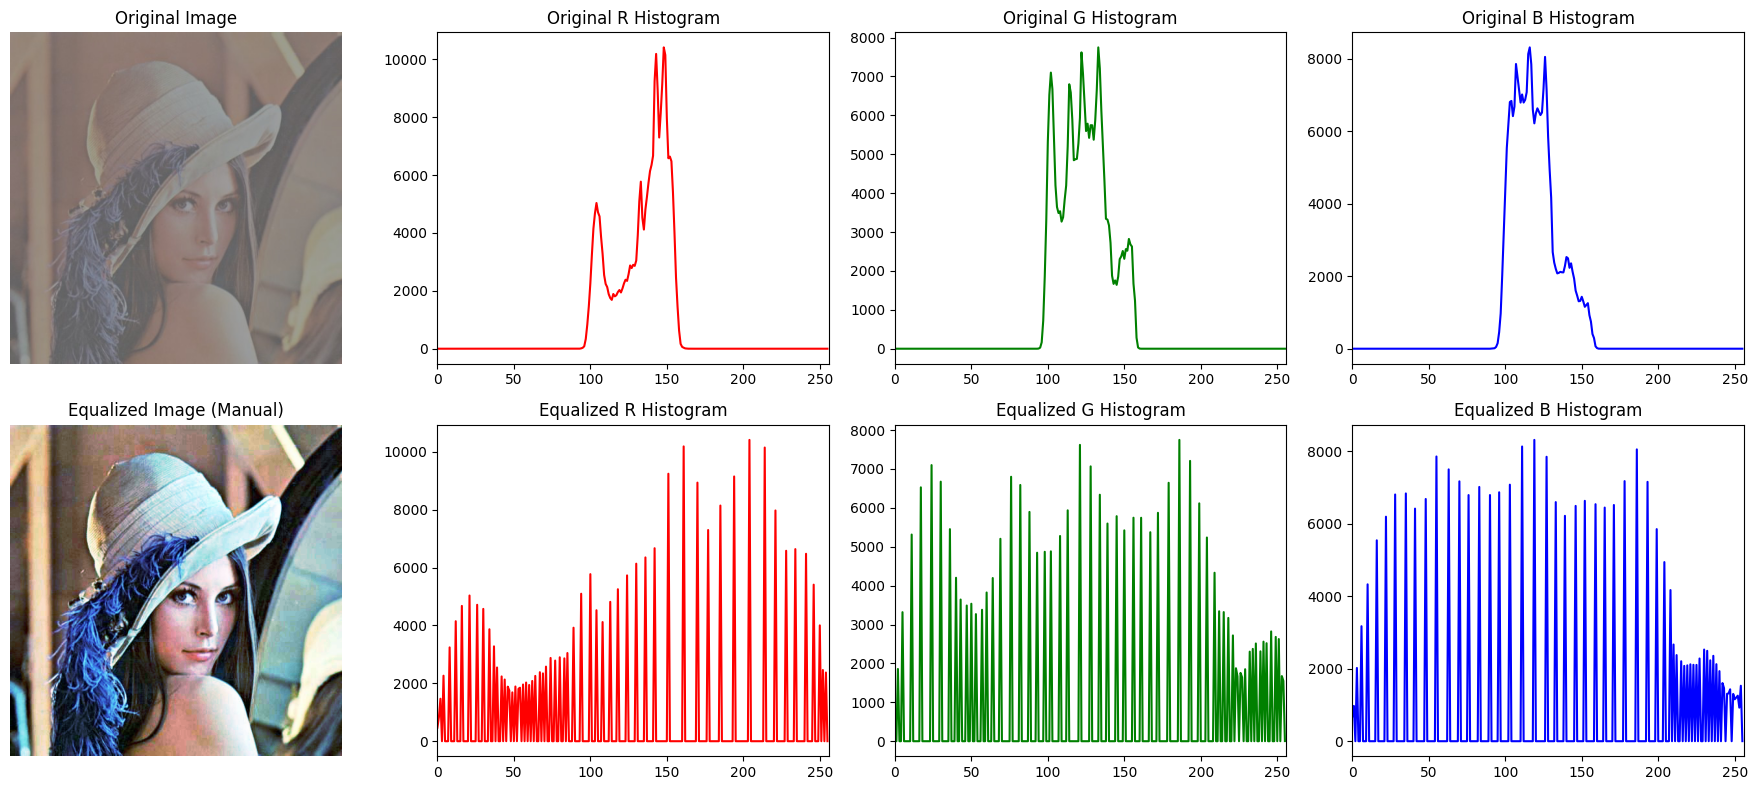

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan histogram equalization secara manual
def manual_histogram_equalization(img):
    # Menghitung histogram
    hist, _ = np.histogram(img.flatten(), bins=256, range=[0, 256])

    # Menghitung kumulatif histogram
    cdf = hist.cumsum()

    # Normalisasi kumulatif histogram
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Membangun tabel pemetaan
    cdf_mapped = np.ma.masked_equal(cdf, 0)  # Menghindari pembagian dengan nol
    cdf_mapped = (cdf_mapped - cdf_mapped.min()) * 255 / (cdf_mapped.max() - cdf_mapped.min())
    cdf_mapped = np.ma.filled(cdf_mapped, 0).astype('uint8')  # Mengisi nilai yang tersembunyi

    # Menerapkan pemetaan pada gambar
    img_equalized = cdf_mapped[img]

    return img_equalized

# Fungsi untuk menampilkan gambar dan histogram
def plot_images_and_histograms_manual(original_img, equalized_img):
    fig, axs = plt.subplots(2, 4, figsize=(18, 8))

    # Menampilkan gambar asli
    axs[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Menampilkan gambar setelah histogram equalization manual
    axs[1, 0].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Equalized Image (Manual)')
    axs[1, 0].axis('off')

    # Membuat histogram terpisah untuk masing-masing channel gambar asli
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([original_img], [2 - i], None, [256], [0, 256])
        axs[0, i + 1].plot(hist, color=col)
        axs[0, i + 1].set_xlim([0, 256])
        axs[0, i + 1].set_title(f'Original {col.upper()} Histogram')

        hist_eq = cv2.calcHist([equalized_img], [2 - i], None, [256], [0, 256])
        axs[1, i + 1].plot(hist_eq, color=col)
        axs[1, i + 1].set_xlim([0, 256])
        axs[1, i + 1].set_title(f'Equalized {col.upper()} Histogram')

    plt.tight_layout()
    plt.show()

# Load gambar
image_path = ('/content/drive/MyDrive/PCVK/lena_lc.jpg')  # Ganti dengan path gambar Anda
original_img = cv2.imread(image_path)

# Pisahkan ke dalam channel BGR
b, g, r = cv2.split(original_img)

# Lakukan histogram equalization untuk setiap channel secara manual
equalized_b = manual_histogram_equalization(b)
equalized_g = manual_histogram_equalization(g)
equalized_r = manual_histogram_equalization(r)

# Gabungkan kembali channel yang telah di-equalize
equalized_img = cv2.merge((equalized_b, equalized_g, equalized_r))

# Tampilkan gambar dan histogram sebelum dan sesudah histogram equalization manual
plot_images_and_histograms_manual(original_img, equalized_img)


## Nomer 6 ( menggunakan library CV2 equalizeHist)

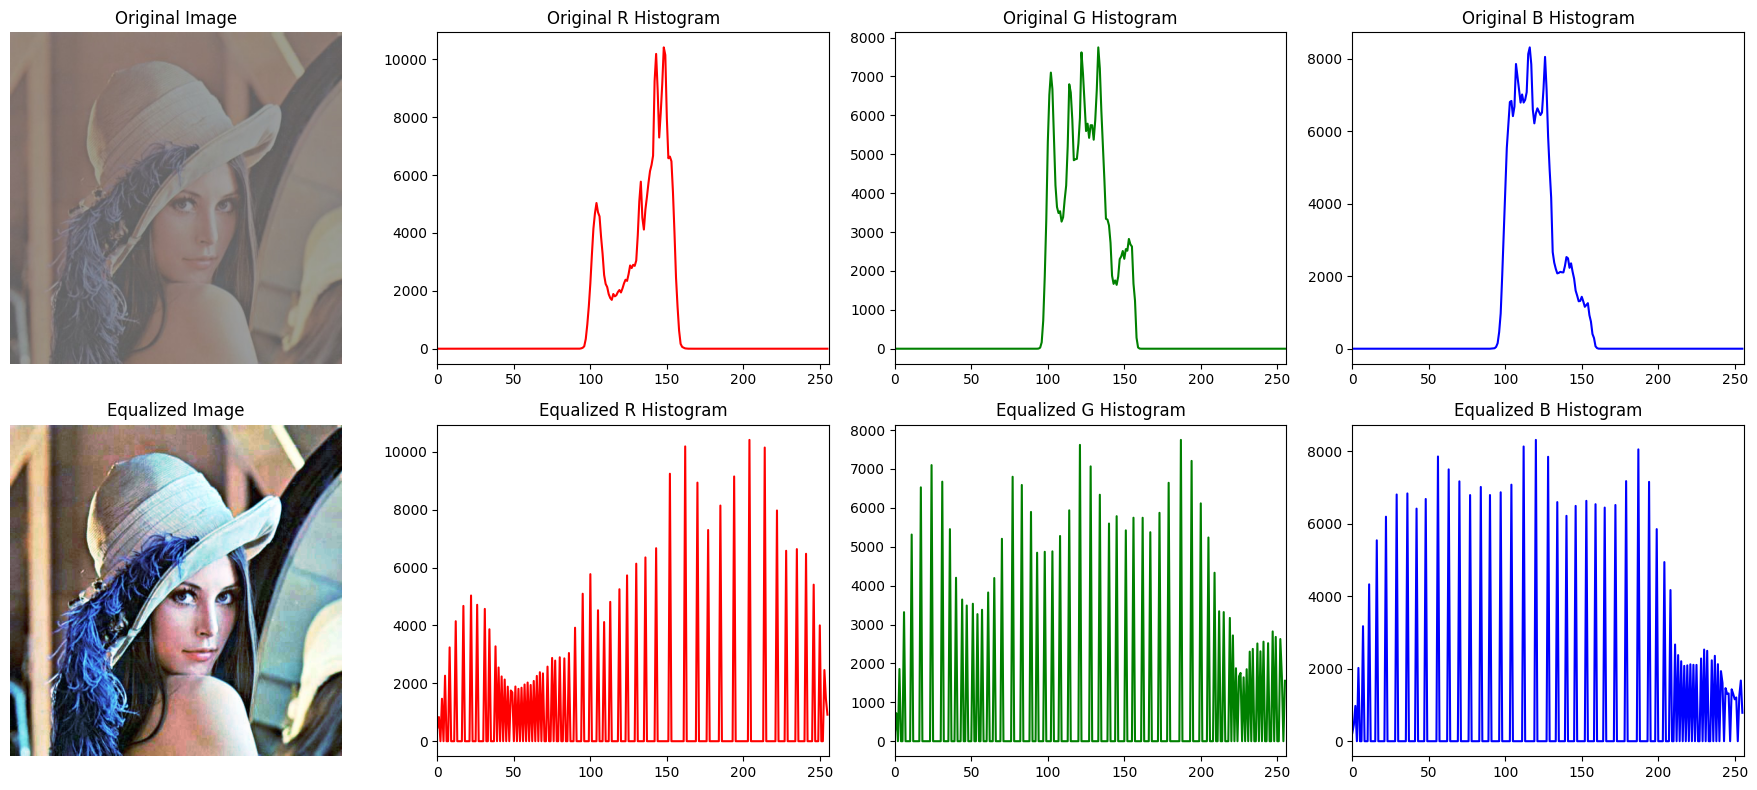

In [12]:
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dan histogram
def plot_images_and_histograms(original_img, equalized_img):
    fig, axs = plt.subplots(2, 4, figsize=(18, 8))

    # Menampilkan gambar asli
    axs[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Menampilkan gambar setelah histogram equalization
    axs[1, 0].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Equalized Image')
    axs[1, 0].axis('off')

    # Membuat histogram terpisah untuk masing-masing channel gambar asli
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([original_img], [2 - i], None, [256], [0, 256])
        axs[0, i + 1].plot(hist, color=col)
        axs[0, i + 1].set_xlim([0, 256])
        axs[0, i + 1].set_title(f'Original {col.upper()} Histogram')

        hist_eq = cv2.calcHist([equalized_img], [2 - i], None, [256], [0, 256])
        axs[1, i + 1].plot(hist_eq, color=col)
        axs[1, i + 1].set_xlim([0, 256])
        axs[1, i + 1].set_title(f'Equalized {col.upper()} Histogram')

    plt.tight_layout()
    plt.show()

# Load gambar
image_path = ('/content/drive/MyDrive/PCVK/lena_lc.jpg')  # Ganti dengan path gambar Anda
original_img = cv2.imread(image_path)

# Pisahkan ke dalam channel BGR
b, g, r = cv2.split(original_img)

# Lakukan histogram equalization untuk setiap channel menggunakan equalizeHist
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Gabungkan kembali channel yang telah di-equalize
equalized_img = cv2.merge((equalized_b, equalized_g, equalized_r))

# Tampilkan gambar dan histogram sebelum dan sesudah histogram equalization
plot_images_and_histograms(original_img, equalized_img)


Hasil dari kedua kode untuk histogram equalization tidak akan identik karena metode yang digunakan berbeda:
### Kode 2: Manual Histogram Equalization
- **Metode**: Menghitung histogram dan menerapkan pemetaan secara manual.
- **Kelebihan**: Memberikan pemahaman lebih dalam dan dapat dimodifikasi.
### Kode 1: Menggunakan `cv2.equalizeHist()`
- **Metode**: Memanfaatkan algoritma bawaan OpenCV.
- **Kelebihan**: Efisien, cepat, dan menghasilkan hasil berkualitas baik.

### Perbandingan Hasil
- **Visual**: Gambar dari kedua metode mungkin memiliki perbedaan kontras dan intensitas warna.
- **Distribusi Histogram**: Histogram hasil mungkin berbeda karena cara penghitungan dan pemetaan.

### Kesimpulan
- Output dari kedua metode tidak identik, tetapi keduanya memperbaiki kontras dan kecerahan gambar. Metode OpenCV biasanya lebih stabil dan konsisten dibandingkan implementasi manual.

## Nomer 7
Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih,merah seperti output berikut berdasarkan flowchart yang barusan tadi aku kirim! (Gunakan gambar lena.jpg)

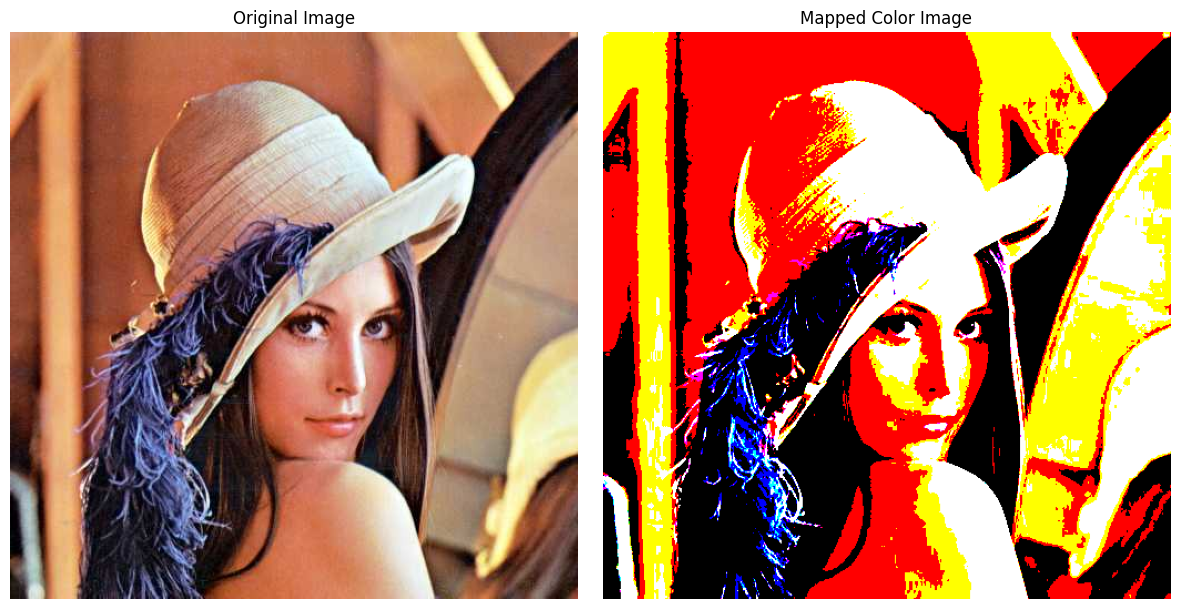

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk pemetaan warna
def map_colors(img):
    # Membuat array kosong untuk menyimpan hasil pemetaan
    mapped_img = np.zeros_like(img)

    # Warna yang akan dipetakan
    color_map = {
        'black': [0, 0, 0],
        'green': [0, 255, 0],
        'yellow': [255, 255, 0],
        'blue': [0, 0, 255],
        'cyan': [0, 255, 255],
        'magenta': [255, 0, 255],
        'white': [255, 255, 255],
        'red': [255, 0, 0]
    }

    # Mendapatkan nilai threshold untuk pemetaan
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            b, g, r = img[i, j]

            # Menghitung jarak warna dari setiap warna dalam color_map
            distances = {color: np.sqrt((b - color_value[0])**2 + (g - color_value[1])**2 + (r - color_value[2])**2)
                         for color, color_value in color_map.items()}

            # Menemukan warna terdekat
            closest_color = min(distances, key=distances.get)
            mapped_img[i, j] = color_map[closest_color]

    return mapped_img

# Load gambar
image_path = ('/content/drive/MyDrive/PCVK/lena.jpg')   # Ganti dengan path gambar Anda
original_img = cv2.imread(image_path)

# Pemetaan warna
mapped_img = map_colors(original_img)

# Tampilkan gambar asli dan gambar setelah pemetaan warna
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mapped_img, cv2.COLOR_BGR2RGB))
plt.title('Mapped Color Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Nomer 8
Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

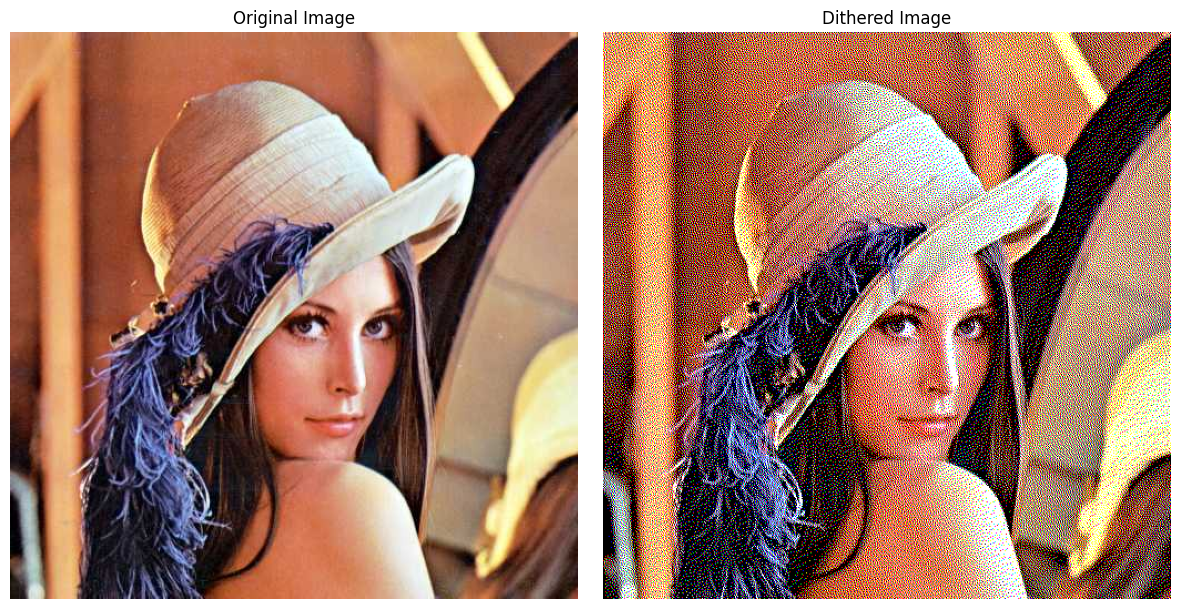

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_dithering(image):
    # Tentukan palet warna yang akan digunakan
    palette = np.array([
        [0, 0, 0],        # Hitam
        [0, 255, 0],      # Hijau
        [255, 255, 0],    # Kuning
        [0, 0, 255],      # Biru
        [0, 255, 255],    # Cyan
        [255, 0, 255],    # Magenta
        [255, 255, 255],  # Putih
        [255, 0, 0]       # Merah
    ])

    # Buat citra hasil dithered
    dithered_img = np.zeros_like(image)

    # Ubah gambar menjadi float untuk menghindari overflow
    img_float = image.astype(float)

    # Iterasi melalui setiap pixel
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Temukan warna terdekat dalam palet
            pixel = img_float[y, x]
            distances = np.linalg.norm(palette - pixel, axis=1)
            closest_color_index = np.argmin(distances)
            dithered_img[y, x] = palette[closest_color_index]

            # Hitung kesalahan
            error = pixel - dithered_img[y, x]

            # Sebarkan kesalahan ke pixel tetangga
            if x + 1 < image.shape[1]:  # Kanan
                img_float[y, x + 1] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < image.shape[0]:  # Kiri Bawah
                img_float[y + 1, x - 1] += error * 3 / 16
            if y + 1 < image.shape[0]:  # Bawah
                img_float[y + 1, x] += error * 5 / 16
            if x + 1 < image.shape[1] and y + 1 < image.shape[0]:  # Kanan Bawah
                img_float[y + 1, x + 1] += error * 1 / 16

    return dithered_img.astype(np.uint8)

# Load gambar
image_path =  ('/content/drive/MyDrive/PCVK/lena.jpg')   # Ganti dengan path gambar Anda
original_img = cv2.imread(image_path)

# Periksa apakah gambar berhasil dimuat
if original_img is None:
    print("Gambar tidak dapat dimuat. Periksa jalur file.")
else:
    # Terapkan dithering
    dithered_img = color_dithering(original_img)

    # Tampilkan gambar asli dan gambar setelah dithering
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
    plt.title('Dithered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## Nomer 9

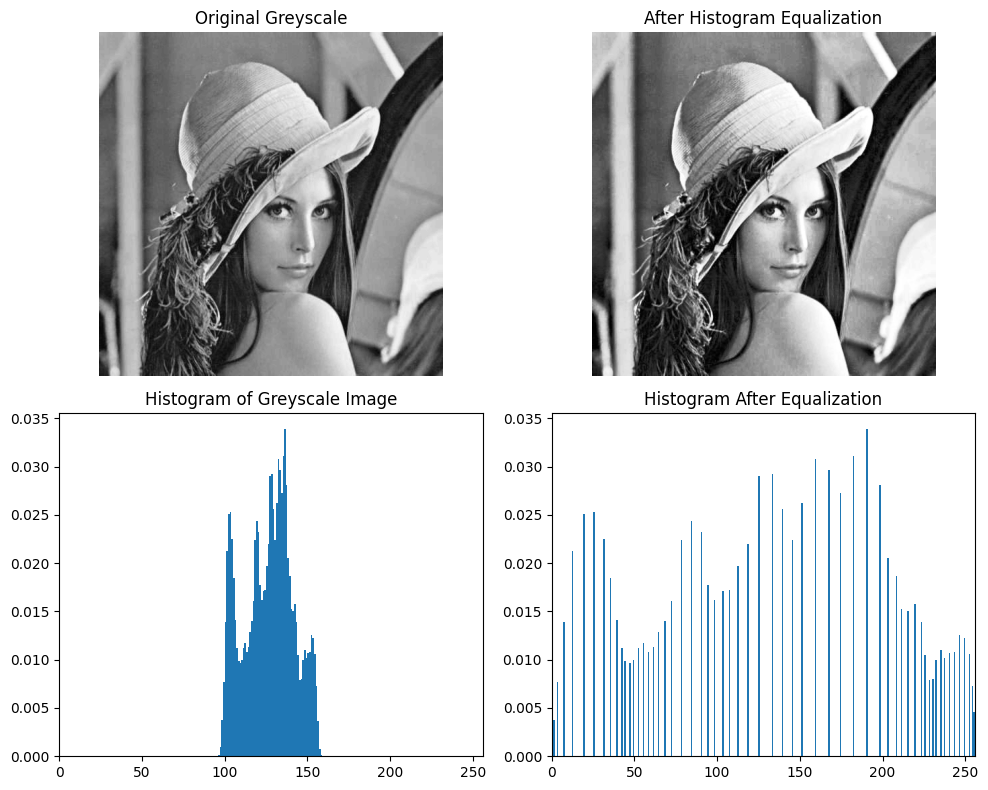

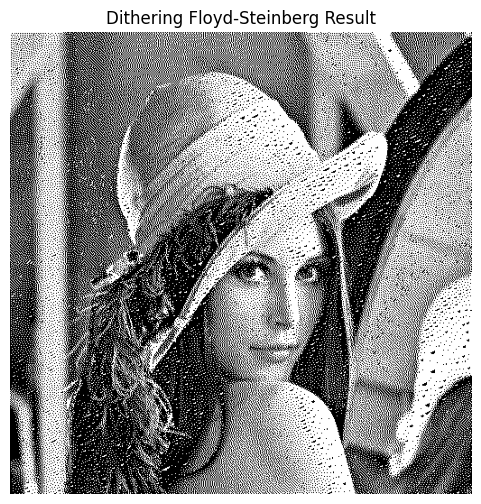

True

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = '/content/drive/MyDrive/PCVK/lena_lc.jpg'  # Ganti dengan path gambar Anda
original_img = cv2.imread(img_path)

# Convert the image to grayscale
img_greyscale = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Histogram Equalization
img_eq = cv2.equalizeHist(img_greyscale)

# Apply Floyd-Steinberg dithering
def floyd_steinberg_dithering(image):
    # Copy the image array to avoid modifying the original image
    img_dithered = image.copy()
    h, w = img_dithered.shape
    for y in range(h):
        for x in range(w):
            old_pixel = img_dithered[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img_dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Floyd-Steinberg weights
            if x + 1 < w:
                img_dithered[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                img_dithered[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                img_dithered[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                img_dithered[y + 1, x + 1] += quant_error * 1 / 16

    # Clip the values to the range [0, 255]
    img_dithered = np.clip(img_dithered, 0, 255)
    return img_dithered.astype(np.uint8)

# Apply Floyd-Steinberg dithering to the equalized image
img_dithered = floyd_steinberg_dithering(img_eq)

# Plot original greyscale, histogram equalization, and dithering result
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_greyscale, cmap='gray')
plt.title("Original Greyscale")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title("After Histogram Equalization")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(img_greyscale.ravel(), bins=256, range=(0, 256), density=True)
plt.title("Histogram of Greyscale Image")
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.hist(img_eq.ravel(), bins=256, range=(0, 256), density=True)
plt.title("Histogram After Equalization")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Show dithering result
plt.figure(figsize=(6, 6))
plt.imshow(img_dithered, cmap='gray')
plt.title("Dithering Floyd-Steinberg Result")
plt.axis('off')
plt.show()

# Save the resulting dithered image
cv2.imwrite('/content/drive/MyDrive/PCVK/dithered_image.png', img_dithered)
